##  Maven Toy Store Revenue Dashboard
This notebook Analyze sales data from Maven Analytics using Python tools.
    
**Goals:**  
- Explore revenue trends, identify top products, and uncover sales patterns by category and weekday/weekend.
- Demonstrate a transition from Excel-based analytics to a fully automated Python workflow.

**Dataset:** Provided by Maven Analytics.

**Tools:** NumPy, Pandas, Matplotlib, ipywidgets

*Note: The following interactive chart section was created with help from AI-assisted suggestions, to quickly add dynamic filtering using ipywidgets.*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import datetime

df = pd.read_excel(r'data/Maven_Toys.xlsx', sheet_name=None)
sheet_names = list(df.keys())
sheet_names

['sales', 'products']

In [10]:
sales = df['sales']
sales

,Sale ID,Date,Product ID,Units
0,1,2017-01-01,31,1
1,2,2017-01-01,8,1
2,3,2017-01-01,8,1
3,4,2017-01-01,33,1
4,5,2017-01-01,9,1
...,...,...,...,...
14919,14920,2018-09-30,7,1
14920,14921,2018-09-30,8,1
14921,14922,2018-09-30,28,1
14922,14923,2018-09-30,14,1


In [11]:
sales.dtypes

Sale ID                int64
Date          datetime64[ns]
Product ID             int64
Units                  int64
dtype: object

In [12]:
sales.keys()

Index(['Sale ID', 'Date', 'Product ID', 'Units'], dtype='object')

In [13]:
products = df['products']
products.head()

,Product ID,Product Name,Product Category,Price
0,1,Action Figure,Toys,15.99
1,2,Animal Figures,Toys,12.99
2,3,Barrel O' Slime,Art & Crafts,3.99
3,4,Chutes & Ladders,Games,12.99
4,5,Classic Dominoes,Games,9.99


In [14]:
products.keys()

Index(['Product ID', 'Product Name', 'Product Category', 'Price'], dtype='object')

In [15]:
sales_analysis = sales.merge(products, on='Product ID', how='left')
sales_analysis

,Sale ID,Date,Product ID,Units,Product Name,Product Category,Price
0,1,2017-01-01,31,1,Splash Balls,Sports & Outdoors,8.99
1,2,2017-01-01,8,1,Deck Of Cards,Games,6.99
2,3,2017-01-01,8,1,Deck Of Cards,Games,6.99
3,4,2017-01-01,33,1,Teddy Bear,Toys,12.99
4,5,2017-01-01,9,1,Dino Egg,Toys,10.99
...,...,...,...,...,...,...,...
14919,14920,2018-09-30,7,1,Dart Gun,Sports & Outdoors,15.99
14920,14921,2018-09-30,8,1,Deck Of Cards,Games,6.99
14921,14922,2018-09-30,28,1,Playfoam,Art & Crafts,10.99
14922,14923,2018-09-30,14,1,Glass Marbles,Games,10.99


In [16]:
sales_analysis['Revenue'] = sales_analysis['Units'] * sales_analysis['Price']
sales_analysis

,Sale ID,Date,Product ID,Units,Product Name,Product Category,Price,Revenue
0,1,2017-01-01,31,1,Splash Balls,Sports & Outdoors,8.99,8.99
1,2,2017-01-01,8,1,Deck Of Cards,Games,6.99,6.99
2,3,2017-01-01,8,1,Deck Of Cards,Games,6.99,6.99
3,4,2017-01-01,33,1,Teddy Bear,Toys,12.99,12.99
4,5,2017-01-01,9,1,Dino Egg,Toys,10.99,10.99
...,...,...,...,...,...,...,...,...
14919,14920,2018-09-30,7,1,Dart Gun,Sports & Outdoors,15.99,15.99
14920,14921,2018-09-30,8,1,Deck Of Cards,Games,6.99,6.99
14921,14922,2018-09-30,28,1,Playfoam,Art & Crafts,10.99,10.99
14922,14923,2018-09-30,14,1,Glass Marbles,Games,10.99,10.99


## Sales Table

In [17]:
sales_analysis['Day_of_Week'] = sales_analysis.Date.dt.day_name()
sales_analysis['Is_Weekend'] = sales_analysis.Date.dt.weekday.isin([5, 6])
sales_analysis['Month_Year'] = sales_analysis.Date.dt.to_period('M')
sales_analysis

,Sale ID,Date,Product ID,Units,Product Name,Product Category,Price,Revenue,Day_of_Week,Is_Weekend,Month_Year
0,1,2017-01-01,31,1,Splash Balls,Sports & Outdoors,8.99,8.99,Sunday,True,2017-01
1,2,2017-01-01,8,1,Deck Of Cards,Games,6.99,6.99,Sunday,True,2017-01
2,3,2017-01-01,8,1,Deck Of Cards,Games,6.99,6.99,Sunday,True,2017-01
3,4,2017-01-01,33,1,Teddy Bear,Toys,12.99,12.99,Sunday,True,2017-01
4,5,2017-01-01,9,1,Dino Egg,Toys,10.99,10.99,Sunday,True,2017-01
...,...,...,...,...,...,...,...,...,...,...,...
14919,14920,2018-09-30,7,1,Dart Gun,Sports & Outdoors,15.99,15.99,Sunday,True,2018-09
14920,14921,2018-09-30,8,1,Deck Of Cards,Games,6.99,6.99,Sunday,True,2018-09
14921,14922,2018-09-30,28,1,Playfoam,Art & Crafts,10.99,10.99,Sunday,True,2018-09
14922,14923,2018-09-30,14,1,Glass Marbles,Games,10.99,10.99,Sunday,True,2018-09


In [18]:
# Daily revenue analysis
daily_revenue = sales_analysis.groupby(['Day_of_Week', 'Is_Weekend']).agg({
    'Revenue': ['sum', 'mean', 'count'],
    'Units': 'sum'
}).round(2)
daily_revenue

Revenue              Units
                             sum   mean count   sum
Day_of_Week Is_Weekend                             
Friday      False       39135.04  17.60  2224  2896
Monday      False       30365.37  17.22  1763  2263
Saturday    True        49504.77  17.70  2797  3823
Sunday      True        49953.29  17.25  2896  3871
Thursday    False       32957.10  17.72  1860  2390
Tuesday     False       27691.82  16.47  1681  2118
Wednesday   False       30319.06  17.80  1703  2194

In [19]:
# Weeekend Analysis
week = sales_analysis.groupby('Is_Weekend')['Revenue'].sum().reset_index()
week

,Is_Weekend,Revenue
0,False,160468.39
1,True,99458.06


In [20]:
# Weekday vs Weekend Revenue
total_revenue = sales_analysis.Revenue.sum()

week['Revenue_Pct'] = (week['Revenue'] / total_revenue * 100).round()
week


,Is_Weekend,Revenue,Revenue_Pct
0,False,160468.39,62.0
1,True,99458.06,38.0


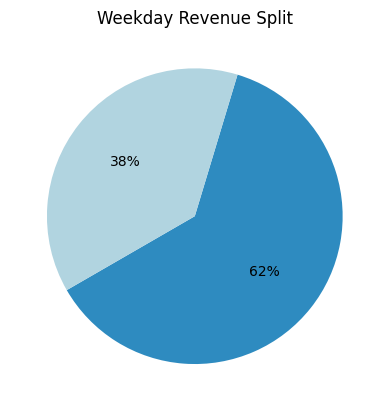

In [21]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(6, 4))
colors = ["#2e8bc0", "#b1d4e0"]
plt.pie(week.Revenue_Pct.values, autopct='%1.0f%%', colors=colors, startangle=210)
plt.title('Weekday Revenue Split')
plt.show()


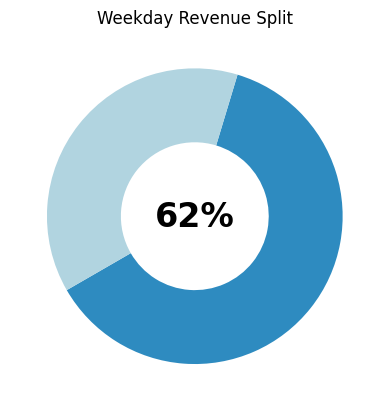

In [22]:
#Weekday Revenue Split
colors = ["#2e8bc0", "#b1d4e0"]
center_percentage = int(week.Revenue_Pct.values[0])
plt.pie(week.Revenue_Pct.values, colors=colors, startangle=210, wedgeprops=dict(width=0.5))
plt.text(0, 0, f'{center_percentage}%', ha='center', va='center', fontsize=24, fontweight='bold')
plt.title('Weekday Revenue Split')
plt.show()

In [23]:
day_revenue = sales_analysis.groupby('Day_of_Week')['Revenue'].sum().sort_values(ascending=False)
day_revenue.reset_index()

,Day_of_Week,Revenue
0,Sunday,49953.29
1,Saturday,49504.77
2,Friday,39135.04
3,Thursday,32957.10
4,Monday,30365.37
5,Wednesday,30319.06
6,Tuesday,27691.82


In [24]:
month_revenue = sales_analysis.groupby('Month_Year')['Revenue'].sum().reset_index()
month_revenue

,Month_Year,Revenue
0,2017-01,9508.28
1,2017-02,9839.15
2,2017-03,10951.52
3,2017-04,11717.68
4,2017-05,12050.57
5,2017-06,11703.29
6,2017-07,10328.81
7,2017-08,9013.82
8,2017-09,10586.38
9,2017-10,11566.22


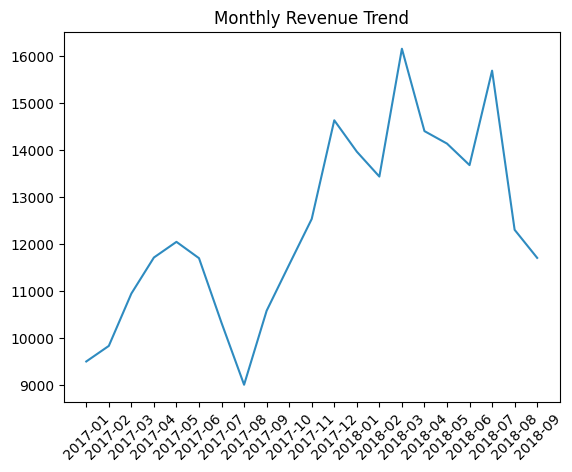

In [25]:
plt.plot(month_revenue.Month_Year.astype(str), month_revenue.Revenue, color='#2e8bc0')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.show()

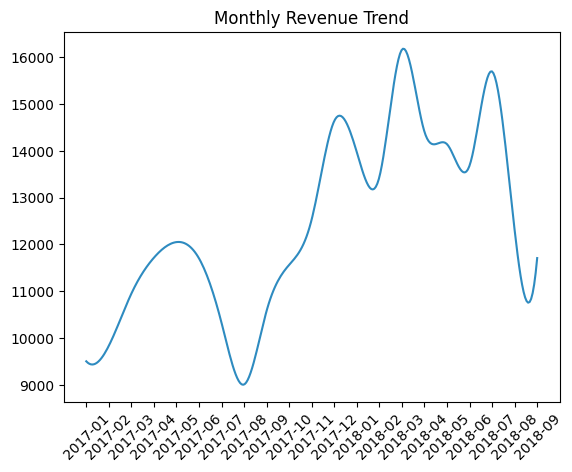

In [26]:
#Monthly Revenue Trend
import numpy as np
from scipy.interpolate import make_interp_spline

x = np.arange(len(month_revenue))
y = month_revenue.Revenue.values

x_smooth = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(x_smooth)

plt.plot(x_smooth, y_smooth, color='#2e8bc0')
plt.title('Monthly Revenue Trend')
plt.xticks(x, month_revenue.Month_Year.astype(str), rotation=45)
plt.show()

In [27]:
products_revenue = sales_analysis.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False)
top_selling_products = products_revenue.reset_index().head(5).round()
top_selling_products

,Product Name,Revenue
0,Lego Bricks,43829.0
1,Colorbuds,27702.0
2,Magic Sand,17301.0
3,Rubik's Cube,17131.0
4,Action Figure,16869.0


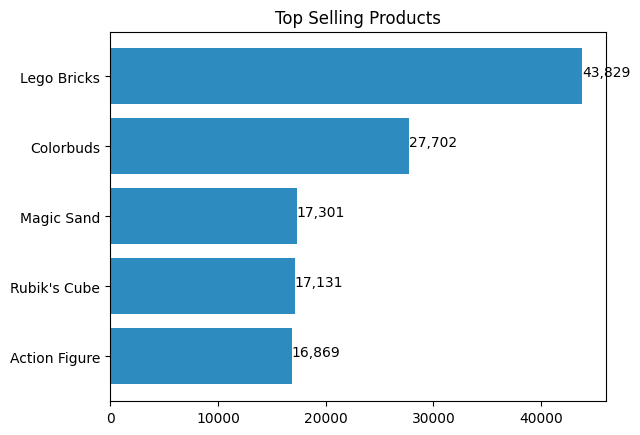

In [28]:
#Top Selling Products
plt.barh(top_selling_products['Product Name'], top_selling_products['Revenue'], color='#2e8bc0')
plt.gca().invert_yaxis()
plt.title('Top Selling Products')
for i, v in enumerate(top_selling_products['Revenue']):
    plt.text(v, i, f'{v:,.0f}')
plt.show()

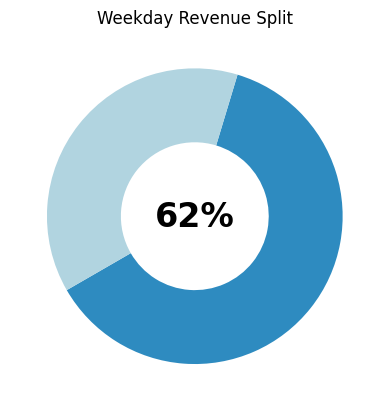

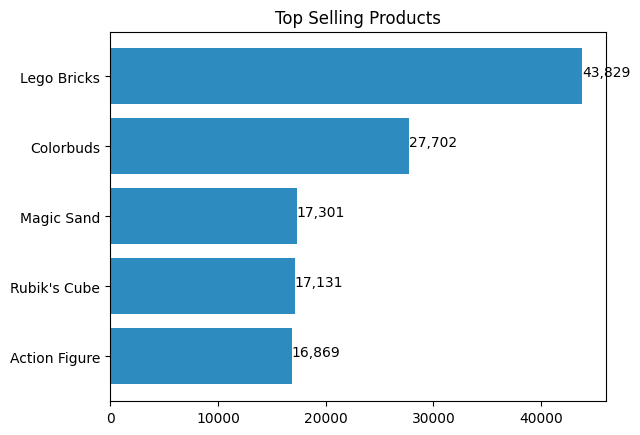

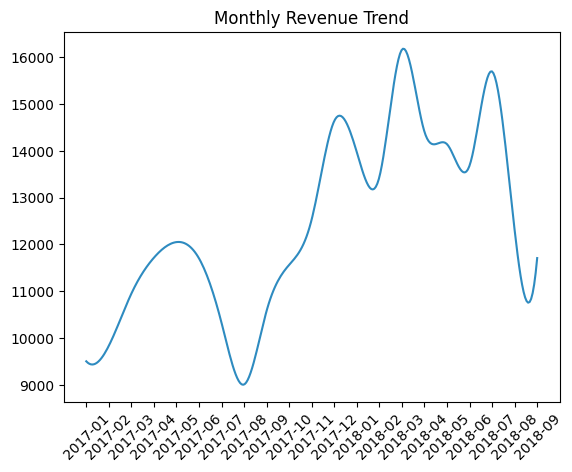

In [29]:
#Weekday Revenue Split
colors = ["#2e8bc0", "#b1d4e0"]
center_percentage = int(week.Revenue_Pct.values[0])
plt.pie(week.Revenue_Pct.values, colors=colors, startangle=210, wedgeprops=dict(width=0.5))
plt.text(0, 0, f'{center_percentage}%', ha='center', va='center', fontsize=24, fontweight='bold')
plt.title('Weekday Revenue Split')
plt.show()

#Top Selling Products
plt.barh(top_selling_products['Product Name'], top_selling_products['Revenue'], color='#2e8bc0')
plt.gca().invert_yaxis()
plt.title('Top Selling Products')
for i, v in enumerate(top_selling_products['Revenue']):
    plt.text(v, i, f'{v:,.0f}')
plt.show()

#Monthly Revenue Trend
x = np.arange(len(month_revenue))
y = month_revenue.Revenue.values

x_smooth = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(x_smooth)

plt.plot(x_smooth, y_smooth, color='#2e8bc0')
plt.title('Monthly Revenue Trend')
plt.xticks(x, month_revenue.Month_Year.astype(str), rotation=45)
plt.show()

In [30]:
# Interactive Dashboard

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from ipywidgets import widgets

categories = ['All'] + list(sales_analysis['Product Category'].unique())
dropdown = widgets.Dropdown(options=categories, description='Category:')

def update_charts(category):
    if category == 'All':
        filtered = sales_analysis
    else:
        filtered = sales_analysis[sales_analysis['Product Category'] == category]
    
    # Calculate weekend/weekday revenue percentages for filtered data
    week_filtered = filtered.groupby('Is_Weekend')['Revenue'].sum().reset_index()
    week_filtered['Revenue_Pct'] = week_filtered['Revenue'] / week_filtered['Revenue'].sum() * 100
    center_percentage = int(week_filtered['Revenue_Pct'].values[0])
    
    # Top selling products from filtered data  
    top_selling_products = filtered.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False).head(5)
    
    # Monthly revenue from filtered data
    month_revenue = filtered.groupby('Month_Year')['Revenue'].sum()
    
    plt.figure(figsize=(15, 5))
    
    # Donut chart
    plt.subplot(131)
    plt.pie(week_filtered['Revenue_Pct'].values, colors=["#2e8bc0", "#b1d4e0"], startangle=210, wedgeprops=dict(width=0.5))
    plt.text(0, 0, f'{center_percentage}%', ha='center', va='center', fontsize=16, fontweight='bold')
    plt.title('Weekend vs Weekday Revenue')
    
    # Horizontal bar chart
    plt.subplot(132)
    plt.barh(top_selling_products.index, top_selling_products.values, color='#2e8bc0')
    plt.gca().invert_yaxis()
    plt.title('Top Selling Products')
    for i, v in enumerate(top_selling_products.values):
        plt.text(v, i, f'{v:,.0f}')
    
    # Smooth line chart
    plt.subplot(133)
    x = np.arange(len(month_revenue))
    y = month_revenue.values
    x_smooth = np.linspace(x.min(), x.max(), 300)
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(x_smooth)
    plt.plot(x_smooth, y_smooth, color='#2e8bc0')
    plt.title('Monthly Revenue Trend')
    plt.xticks(x, month_revenue.index.astype(str), rotation=45)
    
    plt.tight_layout()
    plt.show()

widgets.interact(update_charts, category=dropdown);


interactive(children=(Dropdown(description='Category:', options=('All', 'Sports & Outdoors', 'Games', 'Toys', …